In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#load dataset
data = pd.read_csv('house_rent_dataset.csv')


In [3]:
data.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [4]:
data.shape

(4746, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [15]:
data.sample(5)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
123,2022-05-14,2,8000,800,1 out of 1,Super Area,Behala Chowrasta,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1074,2022-05-27,1,24000,650,3 out of 4,Super Area,Malad East,Mumbai,Semi-Furnished,Bachelors/Family,1,Contact Owner
1903,2022-05-12,3,75000,1850,6 out of 11,Carpet Area,"Jaya Nagar Block 8, Jayanagar",Bangalore,Semi-Furnished,Bachelors,3,Contact Agent
1583,2022-06-06,1,7000,800,1 out of 1,Carpet Area,Babusapalya,Bangalore,Unfurnished,Bachelors/Family,1,Contact Agent
3356,2022-06-14,1,7000,700,Ground out of 2,Super Area,Thiruverkkadu,Chennai,Unfurnished,Bachelors/Family,1,Contact Owner


In [16]:
data.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

In [17]:
data.describe(include="object")

,Posted On,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Point of Contact
count,4746,4746,4746,4746,4746,4746,4746,4746
unique,81,480,3,2235,6,3,3,3
top,2022-07-06,1 out of 2,Super Area,Bandra West,Mumbai,Semi-Furnished,Bachelors/Family,Contact Owner
freq,311,379,2446,37,972,2251,3444,3216


In [18]:
data.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [19]:
data.duplicated().sum()

np.int64(0)

In [20]:
data.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

In [21]:
#drop the column not requird
#axis=1 means we are droping  the column      
#axis=0 means we are droping  the rows
data = data.drop(['posted On','Floor','Area Locality'], axis=1)

KeyError: "['posted On'] not found in axis"

In [18]:
data.columns

Index(['BHK', 'Rent', 'Size', 'Area Type', 'City', 'Furnishing Status',
       'Tenant Preferred', 'Bathroom', 'Point of Contact'],
      dtype='object')

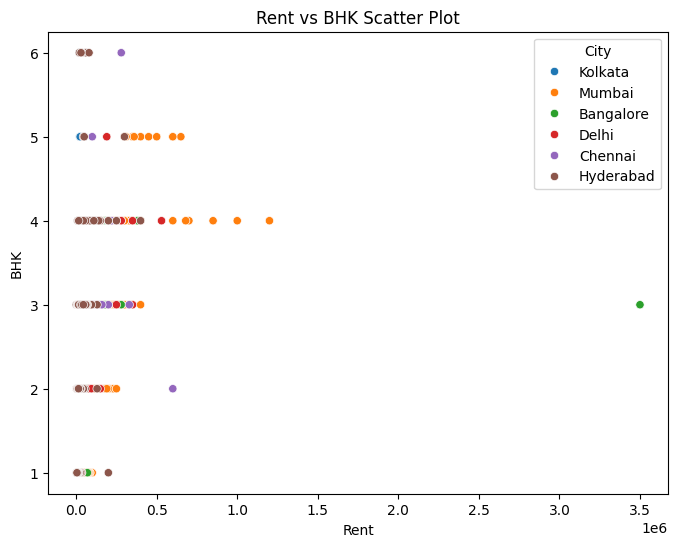

In [19]:
#scatterplot
plt.figure(figsize=(8,6))
sns.scatterplot(x="Rent", y="BHK",hue="City", data=data) 
plt.title("Rent vs BHK Scatter Plot")   
plt.show()

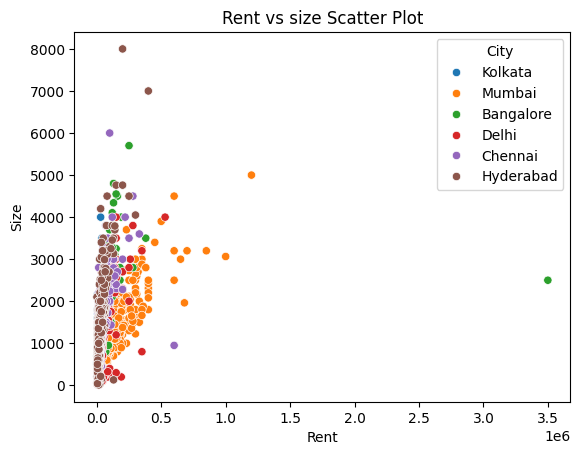

In [20]:
#scatterplot
plt.Figure(figsize=(8,8))
sns.scatterplot(x="Rent", y="Size",hue="City", data=data) 
plt.title("Rent vs size Scatter Plot")   
plt.show()

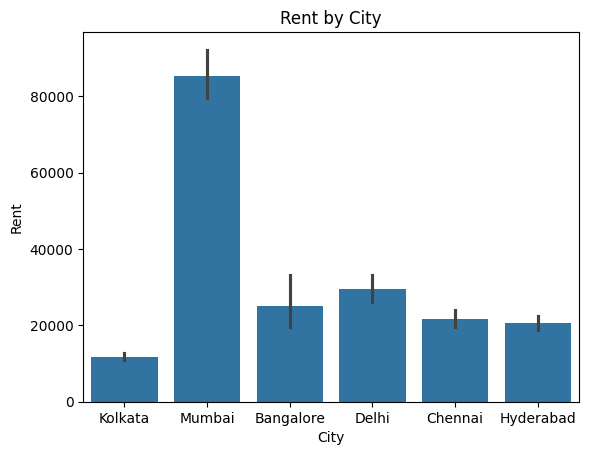

In [21]:
#rent by city
sns.barplot(x="City", y="Rent", data=data)
plt.title("Rent by City")       
plt.show()

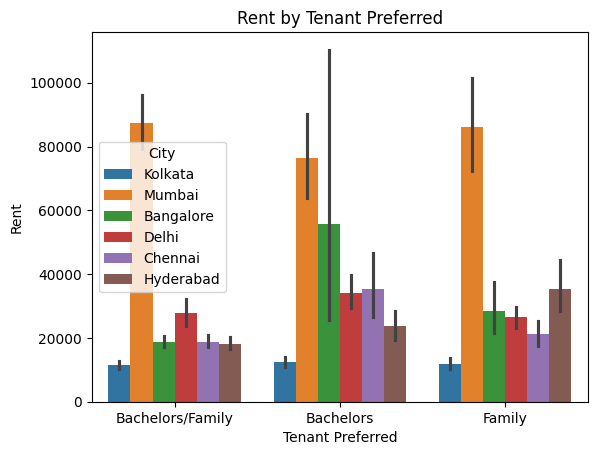

In [22]:
sns.barplot(x="Tenant Preferred", y="Rent", hue="City", data=data)
plt.title("Rent by Tenant Preferred")
plt.show()

#data processing and spliting 

In [23]:
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [24]:
categorical_cols = data.select_dtypes(include=['object']).columns
categorical_cols


Index(['Area Type', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Point of Contact'],
      dtype='object')

In [25]:
for col in categorical_cols:
    print(f"Unique values in '{col}': {data[col].unique()}")

Unique values in 'Area Type': ['Super Area' 'Carpet Area' 'Built Area']
Unique values in 'City': ['Kolkata' 'Mumbai' 'Bangalore' 'Delhi' 'Chennai' 'Hyderabad']
Unique values in 'Furnishing Status': ['Unfurnished' 'Semi-Furnished' 'Furnished']
Unique values in 'Tenant Preferred': ['Bachelors/Family' 'Bachelors' 'Family']
Unique values in 'Point of Contact': ['Contact Owner' 'Contact Agent' 'Contact Builder']


In [26]:
for col in categorical_cols:
    print(f"Unique values in '{col}': {data[col].nunique()}")

Unique values in 'Area Type': 3
Unique values in 'City': 6
Unique values in 'Furnishing Status': 3
Unique values in 'Tenant Preferred': 3
Unique values in 'Point of Contact': 3


In [27]:
data.columns

Index(['BHK', 'Rent', 'Size', 'Area Type', 'City', 'Furnishing Status',
       'Tenant Preferred', 'Bathroom', 'Point of Contact'],
      dtype='object')

In [28]:
y = data['Rent']
x = data.drop('Rent', axis=1)


In [29]:
print(x.head()) 


   BHK  Size    Area Type     City Furnishing Status  Tenant Preferred  \
0    2  1100   Super Area  Kolkata       Unfurnished  Bachelors/Family   
1    2   800   Super Area  Kolkata    Semi-Furnished  Bachelors/Family   
2    2  1000   Super Area  Kolkata    Semi-Furnished  Bachelors/Family   
3    2   800   Super Area  Kolkata       Unfurnished  Bachelors/Family   
4    2   850  Carpet Area  Kolkata       Unfurnished         Bachelors   

   Bathroom Point of Contact  
0         2    Contact Owner  
1         1    Contact Owner  
2         1    Contact Owner  
3         1    Contact Owner  
4         1    Contact Owner  


In [30]:
print(x.dtypes)

BHK                   int64
Size                  int64
Area Type            object
City                 object
Furnishing Status    object
Tenant Preferred     object
Bathroom              int64
Point of Contact     object
dtype: object


In [31]:
print(y.head())

0    10000
1    20000
2    17000
3    10000
4     7500
Name: Rent, dtype: int64


In [32]:
#recorder leaveonhotencoder
import category_encoders as ce
encoder = ce.LeaveOneOutEncoder(return_df=True)
x = encoder.fit_transform(x,y)

In [33]:
x.head()

,BHK,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,1100,18676.943967,11648.319312,22468.505513,31216.953238,2,16706.291757
1,2,800,18672.853988,11629.198853,38727.130222,31214.048795,1,16703.181337
2,2,1000,18674.080982,11634.934990,38728.463556,31214.920128,1,16704.114463
3,2,800,18676.943967,11648.319312,22468.505513,31216.953238,1,16706.291757
4,2,850,52405.438398,11653.099426,22469.883682,42185.583836,1,16707.069362


In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(x)  

In [35]:
x_df = pd.DataFrame(x)

In [36]:
x_df.head()

,BHK,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,1100,18676.943967,11648.319312,22468.505513,31216.953238,2,16706.291757
1,2,800,18672.853988,11629.198853,38727.130222,31214.048795,1,16703.181337
2,2,1000,18674.080982,11634.934990,38728.463556,31214.920128,1,16704.114463
3,2,800,18676.943967,11648.319312,22468.505513,31216.953238,1,16706.291757
4,2,850,52405.438398,11653.099426,22469.883682,42185.583836,1,16707.069362


In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [38]:
x_train.shape

(3796, 8)

In [39]:
x_test.shape

(950, 8)

In [40]:
x_test.shape , y_test.shape

((950, 8), (950,))

#training models and evaluation of linear regression ,random forest,decision tree

In [41]:
model_rfr = RandomForestRegressor()
model_dt = DecisionTreeRegressor()
model_lr = LinearRegression()
#model_xgb = xgbregressor (objective = 'reg:squarederror')
models = [model_rfr, model_dt, model_lr]

In [42]:
for model in models:
     
     print(f"training {model}")
     model.fit(x_train, y_train)

training RandomForestRegressor()
training DecisionTreeRegressor()
training LinearRegression()


In [43]:
for model in models:
    print(f"score of {model} is {model.score(x_test, y_test)}")

score of RandomForestRegressor() is 0.928786862749033
score of DecisionTreeRegressor() is 0.9377639387672173
score of LinearRegression() is 0.5153586519637426


In [ ]:
new_data=pd.DataFrame(
{
    'BHK' : [3],
    'Size' : [1500],
    'Area Type':['Super Area'],
    'City':['Kolkata'],
    'Furnishing Status':['Furnished'],
    'Tenant Preferred':['Family'],
    'Bathroom':[2],
    'Point of Contact':['Contact Owner']
}
)
new_data_encoder= encoder.transform((new_data))
new_data_scaled = scaler.transform(new_data_encoder)
predicted_rent = model_rfr.predict(new_data_scaled)
print(f"The predicted rent for the new data is: {predicted_rent[0]}")
   

The predicted rent for the new data is: 672200.0


C:\Users\nangi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


#deployment

In [54]:
import pickle
# Save the trained model as a pickle file
pickle.dump(model_rfr, open('house_rent_model.pkl', 'wb'))

#save the encoder
pickle.dump(encoder, open('encoder.pkl', 'wb'))

#save the scaler
pickle.dump(scaler, open('scaler.pkl', 'wb'))

print("Model , Encoder and Scaler saved successfully")

Model , Encoder and Scaler saved successfully
